In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('song_data.csv')
df

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,Boulevard of Broken Dreams,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,In The End,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,Seven Nation Army,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,By The Way,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,How You Remind Me,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18830,Let It Breathe,60,159645,0.893000,0.500,0.151,0.000065,11,0.1110,-16.107,1,0.0348,113.969,4,0.300
18831,Answers,60,205666,0.765000,0.495,0.161,0.000001,11,0.1050,-14.078,0,0.0301,94.286,4,0.265
18832,Sudden Love (Acoustic),23,182211,0.847000,0.719,0.325,0.000000,0,0.1250,-12.222,1,0.0355,130.534,4,0.286
18833,Gentle on My Mind,55,352280,0.945000,0.488,0.326,0.015700,3,0.1190,-12.020,1,0.0328,106.063,4,0.323


In [3]:
df['song_popularity'] = np.where(df['song_popularity'] < 55, "Flop", "Bop")

<AxesSubplot:>

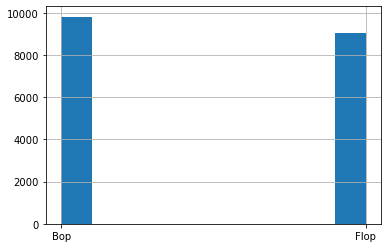

In [4]:
df['song_popularity'].hist()

<AxesSubplot:xlabel='song_popularity', ylabel='Count'>

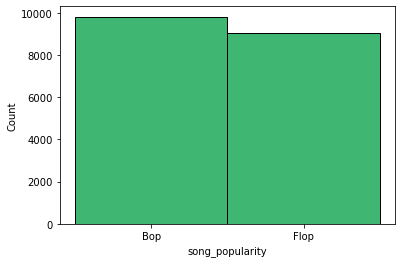

In [10]:
sns.histplot(df['song_popularity'],color="#009E44")

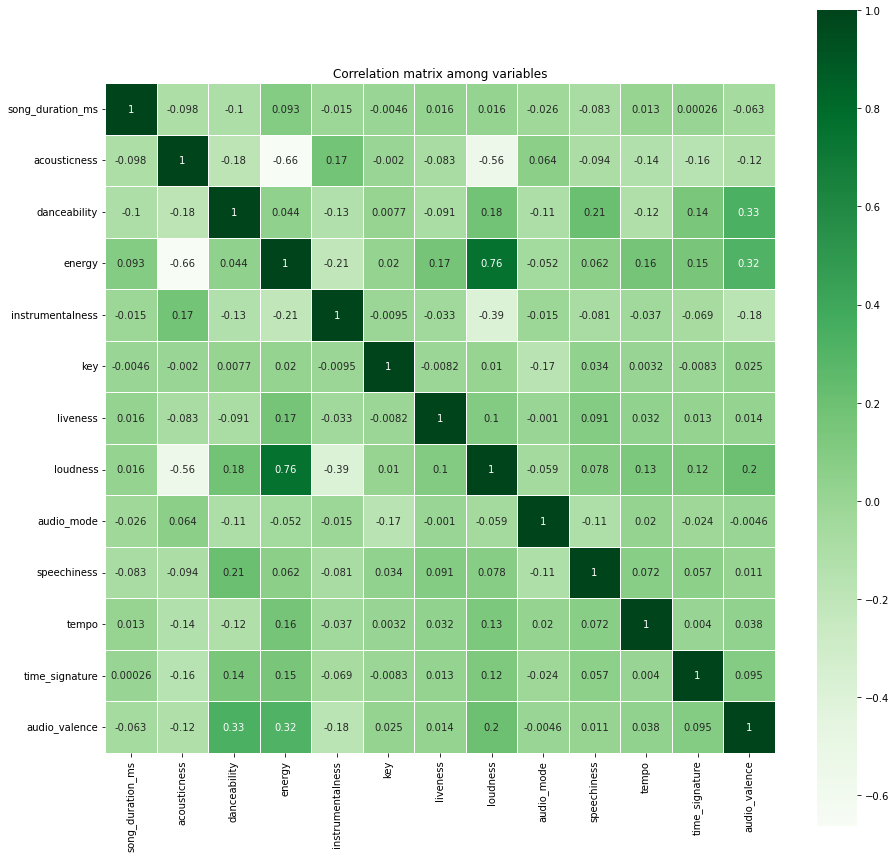

In [30]:
# Using heatmap to observe correlations.
cormat = df.corr()
plt.figure(figsize=(15,15))
sns.heatmap(cormat, square=True, annot=True, linewidths=.5,cmap = "Greens")
plt.title("Correlation matrix among variables")
plt.show()

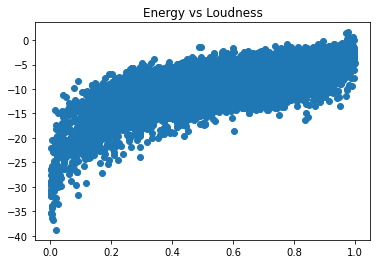

In [6]:
plt.scatter(df["energy"], df["loudness"])
plt.title("Energy vs Loudness")
plt.show()

In [8]:
df.columns

Index(['song_name', 'song_popularity', 'song_duration_ms', 'acousticness',
       'danceability', 'energy', 'instrumentalness', 'key', 'liveness',
       'loudness', 'audio_mode', 'speechiness', 'tempo', 'time_signature',
       'audio_valence'],
      dtype='object')

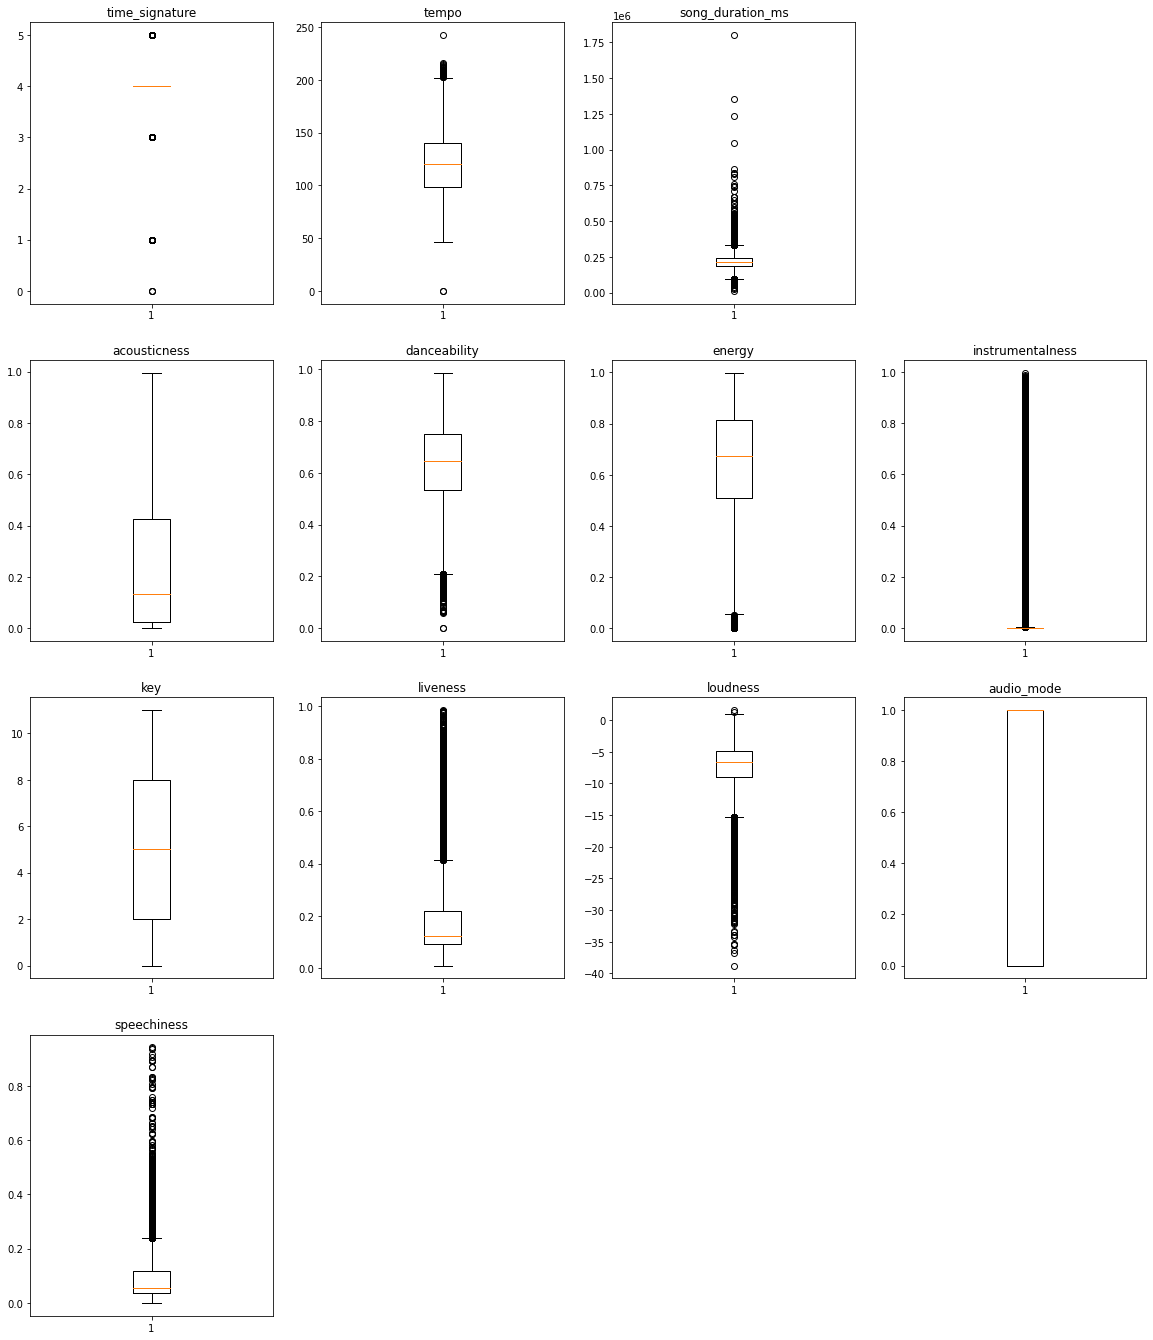

In [9]:
# Create a dictionary of columns.
col_dict = {'time_signature':1, 'tempo':2,
            'song_duration_ms':3, 'acousticness':4,
            'acousticness':5,'danceability':6,
            'energy':7,'instrumentalness':8,
            'key':9,'liveness':10,
            'loudness':11,'audio_mode':12,
            'speechiness':13}

# Detect outliers in each variable using box plots.
plt.figure(figsize=(20,30))

for variable,i in col_dict.items():
                     plt.subplot(5,4,i)
                     plt.boxplot(df[variable])
                     plt.title(variable)

plt.show()

In [15]:
from sklearn.model_selection import train_test_split
# Split the data to train and test set
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, 
                                                    test_size=0.3, 
                                                    stratify = y, 
                                                    random_state=1)

In [16]:
X = df.drop(['song_popularity','song_name'], axis=1)
y = df['song_popularity']

In [17]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

In [18]:
# instantiate the scaler
scaler = StandardScaler()

In [19]:
# fit the scaler only to the X_train data
scaler = scaler.fit(X_train) #only fit x train data into scalar

In [20]:
# transform both the X_train and X_test data with the fitted scaler
X_train_ss = scaler.transform(X_train)
X_test_ss = scaler.transform(X_test)

In [21]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [22]:
model.fit(X_train, y_train)

LogisticRegression()

In [23]:
y_predicted = model.predict(X_test)

In [24]:
y_predicted

array(['Bop', 'Bop', 'Bop', ..., 'Bop', 'Bop', 'Bop'], dtype=object)

In [25]:
model.predict_proba(X_test) #predict_proba
#predict probability
#0.3 probability of winning, 0.7 prob of losting
#0.88 prob of winning, 0.2 prob of losing

array([[0.51779111, 0.48220889],
       [0.52467048, 0.47532952],
       [0.52374863, 0.47625137],
       ...,
       [0.51530093, 0.48469907],
       [0.52078654, 0.47921346],
       [0.51537565, 0.48462435]])

In [26]:
model.score(X_test,y_test)

0.5207927800389311

### Polynomial Regression

In [34]:
from sklearn.preprocessing import PolynomialFeatures
for i in range(1,7):
    poly_reg = PolynomialFeatures(degree=i) #power is 2
    #y = 1 + x + m**1*x**2 + m**2*x**3

    poly_reg.fit(X_train_ss)
    X_train_poly = poly_reg.transform(X_train_ss) #trainsform according to polynomial regression
    X_test_poly = poly_reg.transform(X_test_ss) #tranform according to polynomial regression
    lr = LogisticRegression() #create a linear regression object

    lr.fit(X_train_poly, y_train) #now you can fit your data!

    print(lr.score(X_test_poly, y_test)) #score is 95%

0.5905149531056451
0.6165280481330738


C:\Users\jsmba\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.6145814900017696


C:\Users\jsmba\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.6190054857547337


C:\Users\jsmba\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.6147584498318882


C:\Users\jsmba\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.5710493717926031


In [36]:
from sklearn.neighbors import KNeighborsClassifier

#Fit default KNN model
KNN_model = KNeighborsClassifier()
KNN_model.fit(X_train_ss, y_train)

#print(KNN_model.n_neighbours)
print(KNN_model.score(X_test_ss,y_test))
print(KNN_model.score(X_train_ss,y_train))

0.6122810122102282
0.7543992718446602


In [39]:
from sklearn.ensemble import RandomForestClassifier

my_rf = RandomForestClassifier(n_estimators = 2)
my_rf.fit(X_train_ss,y_train)

print(my_rf.score(X_train_ss,y_train),my_rf.score(X_test_ss,y_test))

0.8470873786407767 0.6075030967970271
